# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [2]:
#a) Import Data
wine <- read_csv("~/Desktop/BIOS512/Homeworks/Homework 5/wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#b)Check out the columns present using one of R's data frame summary
glimpse(wine)

Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

In [4]:
#c) Get summary statistics on the numeric variables.
summary(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [7]:
#a) Scale and center your data
wine_scaled <- wine %>%
  mutate(across(
    .cols = -class, 
    .fns = ~ as.numeric(scale(.))
  ))

b) Why would scaling and centering this data be helpful before we perform PCA?

The summary statistics show that the variables are on different scales. If we didn’t scale before using PCA, it would be dominated by 
#the variables with the largest values. Scaling and centering standardizes all variables and ensures equal variance. It is useful useful when variable importance is unknown.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [8]:
#a) Perform PCA
wine_scaled <- wine_scaled %>% select(-class)
pca_result <- prcomp(wine_scaled)

In [9]:
#b) How much of the total variance is explained by PC1? PC2? 
# What function do we use to see that information?

#Function:
summary(pca_result)

# 36.2% of the total variance is explained by PC1
# 19.21% of the total variance is explained by PC2

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

c) Why are we doing PCA first?

We do PCA first because it reduces the dimensionality of the dataset by summarizing many correlated variables into a smaller number of uncorrelated components. This helps us remove redundancy, highlights the most important sources of variation to make the data easier to visualize and less noisy. 

d) What is the rotation matrix? 

A rotation matrix is the set of loadings that tell you how much each original variable contributes
to each principal component. PCA produces a rotation matrix that can be applied to any new vector of the same dimensionality.


In [10]:
#Print the rotation matrix explicitly
pca_result$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


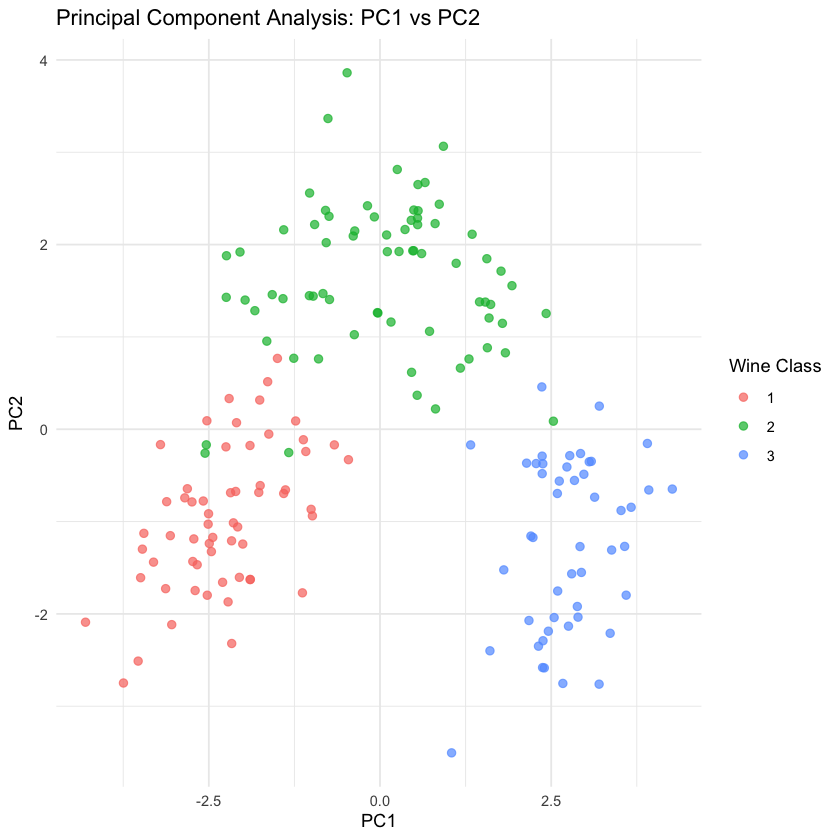

In [11]:
#e) Plot PC1 vs. PC2
pc_plot <- as.data.frame(pca_result$x) %>%
  select(PC1, PC2)

pc_plot <- pc_plot %>%
  mutate(class = wine$class)

ggplot(pc_plot, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 2, alpha = 0.7) +
  labs(
    title = "Principal Component Analysis: PC1 vs PC2",
    color = "Wine Class"
  ) +
  theme_minimal()

f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

After plotting PC1 vs. PC2, I see that the wine samples form distinct clusters by class. Even though there is some overlap, it shows that the first 2 principal components capture enough of the variance to begin separating the wines into groups. In the context of wine classes, this means that the measured chemical properties (like alcohol, acidity, etc.) differ systematically across wine types. While not perfectly seperated by cluster,the PCA demonstrates that the classes are distinguishable based on their chemical profiles.




#g) Give an example of data where PCA would fail.

PCA would fail for a dataset that has non-linear structure or that has only one meaningful degree of variation. For example, a dataset containing only different weight measurements would not perform well with a PCA, because there is no complex structure/dimensionality to reduce. When all the variation is along a single dimension, PCA can't uncover anything new.

h) Explain the difference between vector space and manifold, and how these terms apply to what 
we did/will do with T-SNE.

A vector space is a mathematical space where data relationships are linear and any combination of points stays within the space. A manifold can be non-linear, but locally behaves like a vector space. PCA assumes the data lies in a vector space and extracts global linear patterns of maximum variance. T‑SNE, does not assume linearity. It is designed to capture nonlinear structures by preserving the local relationships between points.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [12]:
# a)Perform T-SNE
set.seed(123)

input <- as.data.frame(pca_result$x) %>%
  select(PC1:PC10) %>%
  mutate(class = wine$class)

input_unique <- input %>%
  distinct()

tsne_result <- Rtsne(
  input_unique %>% select(-class), 
  dims = 2, 
  perplexity = 30, 
  verbose = TRUE, 
  max_iter = 500
)

Performing PCA
Read the 178 x 10 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.02 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.392910 (50 iterations in 0.03 seconds)
Iteration 100: error is 50.181178 (50 iterations in 0.02 seconds)
Iteration 150: error is 51.003086 (50 iterations in 0.02 seconds)
Iteration 200: error is 50.845809 (50 iterations in 0.02 seconds)
Iteration 250: error is 50.796919 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.480252 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.402731 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.373962 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.369167 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.367671 (50 iterations in 0.01 seconds)
Fitting performed in 0.17 seconds.


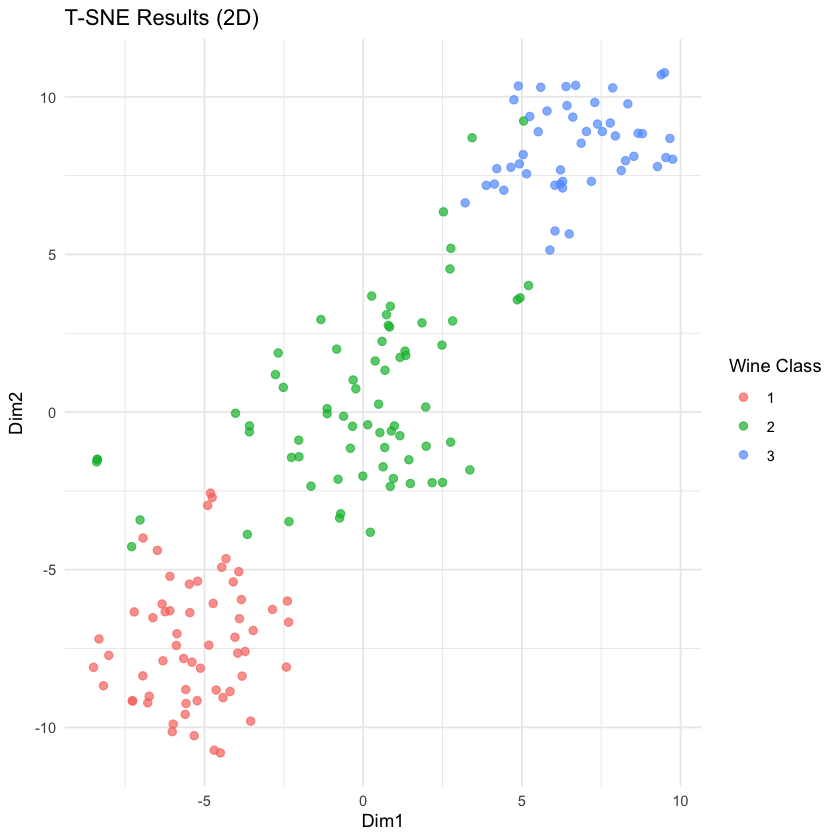

In [13]:
#b) Plot the results in 2D
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(Dim1 = V1, Dim2 = V2) %>%
  mutate(class = input_unique$class)

ggplot(tsne_plot, aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point(size = 2, alpha = 0.7) +
  labs(
    title = "T-SNE Results (2D)",
    color = "Wine Class"
  ) +
  theme_minimal()

c) Why didn't we stop at PCA?

T-SNE is helpful for visualizing clusters or groupings in high-dimensional data that PCA may not
be able to separate clearly. It provides a more flexible, and non-linear visualization of structure 
and clusters after dimensionality has been reduced. T-SNE accomplishes both a dimensionality reduction and a simplification of the distribution of points.

d) What other types of data does this workflow make sense for?

This workflow would work well for analyzing a dataset from survey or questionnaire data. This would be a large dataset set with many correlated variables or responses. A PCA would reduce many correlated survey questions into a smaller set of components. A T‑SNE might reveal clusters of respondents who answer similarly across questions, even if those patterns aren’t obvious from the raw data.
